In [ ]:
# ===== Core libraries =====
import numpy as np
import cv2
import urllib.request
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization

from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


#Data Preparation and Exploration

In [18]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.1, random_state=101
)


In [56]:
X_train.shape, y_train.shape

((45000, 32, 32, 3), (45000, 1))

In [57]:
X_valid.shape, y_valid.shape

((5000, 32, 32, 3), (5000, 1))

In [58]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [59]:
class_names = ['airplane', 'automobile', 'bird','cat','deer','dog','frog','horse','ship','truck']

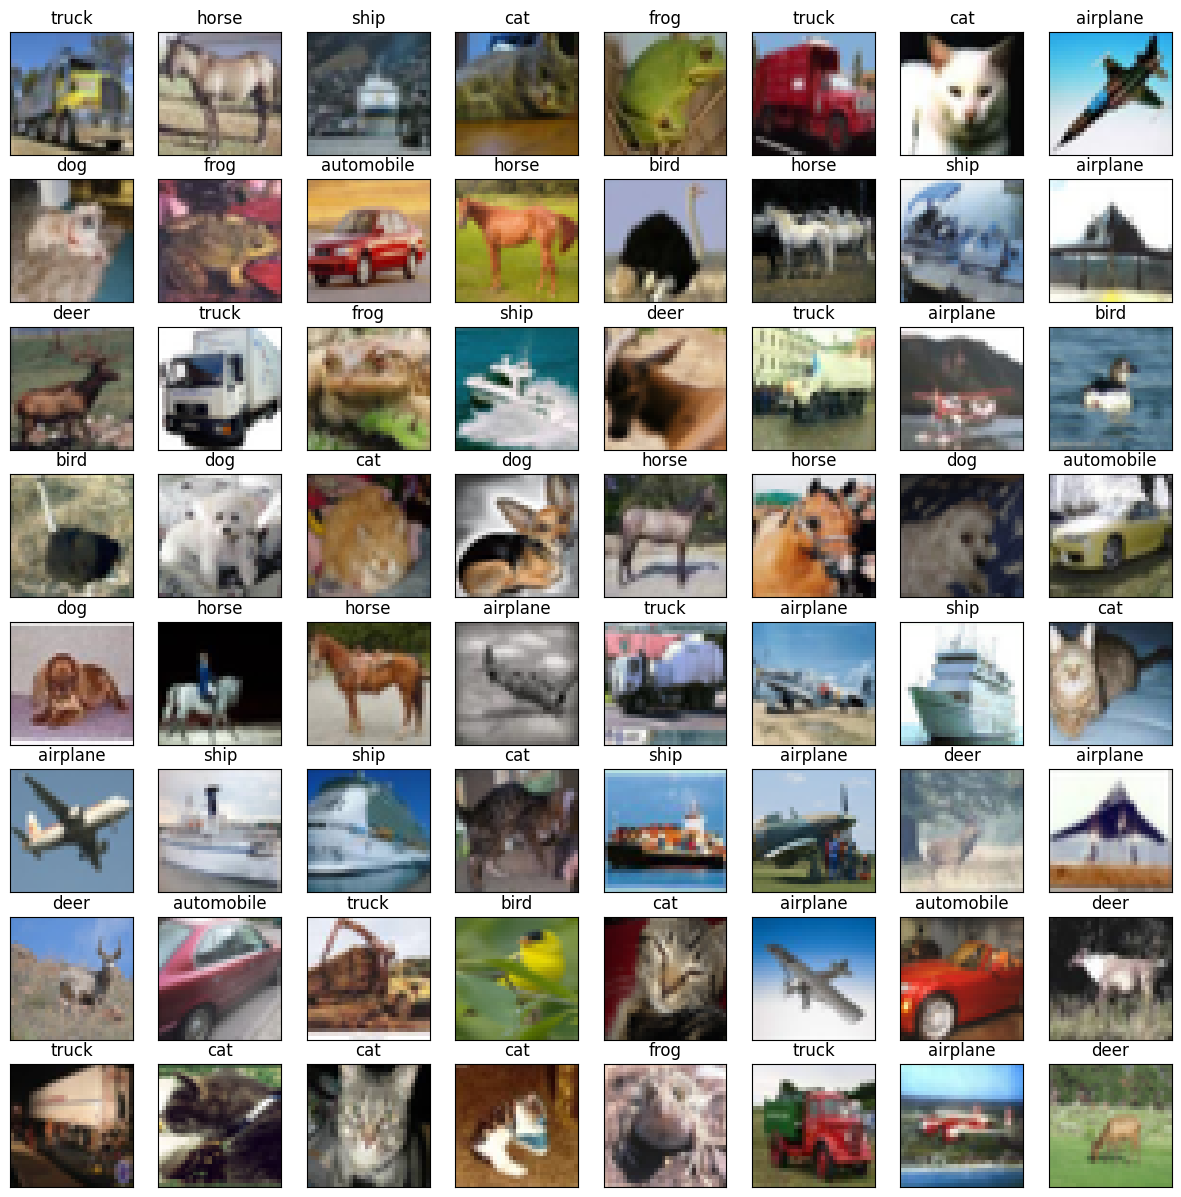

In [60]:
plt.figure(figsize=(15,15))
for i in range(64):
  plt.subplot(8,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i])
  plt.title(class_names[y_train[i][0]])

plt.show()

# Data Preprocssing

1. Normalisation of images
2. One hot encoding of Labels
3. Data Augmentation

#### Normalisation

In [ ]:
#Converting pixel values to float32

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_valid = X_valid.astype('float32')

mean = np.mean(X_train)
std = np.std(X_train)

X_train = (X_train-mean)/(std+.00000001)
X_test = (X_test-mean)/(std+.00000001)
X_valid = (X_valid-mean)/(std+.00000001)

#### One Hot Encoding of Labels

In [62]:
y_train = to_categorical(y_train,10)
y_valid = to_categorical(y_valid,10)
y_test = to_categorical(y_test,10)

#### Data Augmentation

In [ ]:
data_generator = ImageDataGenerator(
    rotation_range = 15, #rotate images by up to 15 degree
    width_shift_range = .12, 
    height_shift_range = 0.12,
    horizontal_flip =True,
    zoom_range = 0.1,
    brightness_range = [0.9,1.1],
    shear_range = 10, 
    channel_shift_range = 0.1
)

## Model

In [66]:
model = Sequential()

weight_decay = 0.0001 

model.add(Conv2D(filters=32, kernel_size = (3,3), padding='same', activation = 'relu', kernel_regularizer =l2(weight_decay), input_shape = X_train.shape[1:]))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size = (3,3), padding='same', activation = 'relu', kernel_regularizer =l2(weight_decay)))
model.add(BatchNormalization())

#Add first max pooling layer with pool size of 2*2
model.add(MaxPooling2D(pool_size=(2,2)))
#Add dropout layer with 0.2 dropout rate
model.add(Dropout(rate=0.2))


#Add the third and fourth Conv layers
model.add(Conv2D(filters=64, kernel_size = (3,3), padding='same', activation = 'relu', kernel_regularizer =l2(weight_decay)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size = (3,3), padding='same', activation = 'relu', kernel_regularizer =l2(weight_decay)))
model.add(BatchNormalization())

#Add 2nd max pooling layer with pool size of 2*2
model.add(MaxPooling2D(pool_size=(2,2)))
#Add dropout layer with 0.3 dropout rate
model.add(Dropout(rate=0.3))


model.add(Conv2D(filters=128, kernel_size = (3,3), padding='same', activation = 'relu', kernel_regularizer =l2(weight_decay)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), padding='same', activation = 'relu', kernel_regularizer =l2(weight_decay)))
model.add(BatchNormalization())

#Add 3rd max pooling layer with pool size of 2*2
model.add(MaxPooling2D(pool_size=(2,2)))
#Add dropout layer with 0.4 dropout rate
model.add(Dropout(rate=0.4))


model.add(Conv2D(filters=256, kernel_size = (3,3), padding='same', activation = 'relu', kernel_regularizer =l2(weight_decay)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size = (3,3), padding='same', activation = 'relu', kernel_regularizer =l2(weight_decay)))
model.add(BatchNormalization())


#Add 4th max pooling layer with pool size of 2*2
model.add(MaxPooling2D(pool_size=(2,2)))
#Add dropout layer with 0.5 dropout rate
model.add(Dropout(rate=0.5))


#Flatten the tensor output from the previous layer
model.add(Flatten())

#Add a fully connected layer with softmax activation function
model.add(Dense(10,activation='softmax'))

c:\Users\anjal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,186,346 (4.53 MB)

 Trainable params: 1,184,426 (4.52 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [73]:

batch_size =64

epochs = 150 

optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience = 10, min_lr = .00001)

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 40, restore_best_weights=True, verbose=1)

model.fit(data_generator.flow(X_train, y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_valid, y_valid),
                              callbacks = [reduce_lr, early_stopping],
                              verbose=2)

Epoch 1/150
704/704 - 111s - 157ms/step - accuracy: 0.7556 - loss: 0.8772 - val_accuracy: 0.8222 - val_loss: 0.6857 - learning_rate: 5.0000e-04
Epoch 2/150
704/704 - 111s - 158ms/step - accuracy: 0.7574 - loss: 0.8678 - val_accuracy: 0.7952 - val_loss: 0.7793 - learning_rate: 5.0000e-04
Epoch 3/150
704/704 - 112s - 159ms/step - accuracy: 0.7690 - loss: 0.8453 - val_accuracy: 0.8076 - val_loss: 0.7497 - learning_rate: 5.0000e-04
Epoch 4/150
704/704 - 118s - 168ms/step - accuracy: 0.7739 - loss: 0.8289 - val_accuracy: 0.7934 - val_loss: 0.7993 - learning_rate: 5.0000e-04
Epoch 5/150
704/704 - 108s - 153ms/step - accuracy: 0.7769 - loss: 0.8182 - val_accuracy: 0.8140 - val_loss: 0.7148 - learning_rate: 5.0000e-04
Epoch 6/150
704/704 - 120s - 170ms/step - accuracy: 0.7826 - loss: 0.8172 - val_accuracy: 0.8334 - val_loss: 0.6643 - learning_rate: 5.0000e-04
Epoch 7/150
704/704 - 122s - 174ms/step - accuracy: 0.7831 - loss: 0.8148 - val_accuracy: 0.8260 - val_loss: 0.6975 - learning_rate: 5.0

KeyboardInterrupt: 

## Visualizing the Learning Curves

In [74]:
# 1️⃣ Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=20,
    batch_size=64
)

plt.figure(figsize=(15,6))

# --- Plot Loss ---
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.title('Loss Evolution')

# --- Plot Accuracy ---
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()


Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 101s 140ms/step - accuracy: 0.8774 - loss: 0.5647 - val_accuracy: 0.8896 - val_loss: 0.5420
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 95s 135ms/step - accuracy: 0.8873 - loss: 0.5303 - val_accuracy: 0.8974 - val_loss: 0.5221
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 96s 137ms/step - accuracy: 0.8929 - loss: 0.5121 - val_accuracy: 0.8958 - val_loss: 0.5259
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 96s 136ms/step - accuracy: 0.8970 - loss: 0.5066 - val_accuracy: 0.8998 - val_loss: 0.5219
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 100s 142ms/step - accuracy: 0.9032 - loss: 0.4887 - val_accuracy: 0.9020 - val_loss: 0.5121
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 88s 125ms/step - accuracy: 0.9086 - loss: 0.4780 - val_accuracy: 0.8944 - val_loss: 0.5337
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 87s 123ms/step - accuracy: 0.9106 - loss: 0.4707 - val_accuracy: 0.8908 - val_loss: 0.5661
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 93s 132ms/step - accuracy: 0.9146 - loss:

KeyboardInterrupt: 

## Evaluating the Optimal Model on Test Data

In [72]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose = 1)

print(f'Test Accuracy : {test_acc}\nTestLoss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7900 - loss: 0.7780
Test Accuracy : 0.7900000214576721
TestLoss: 0.7779930830001831


# performance on an out of Dataset image

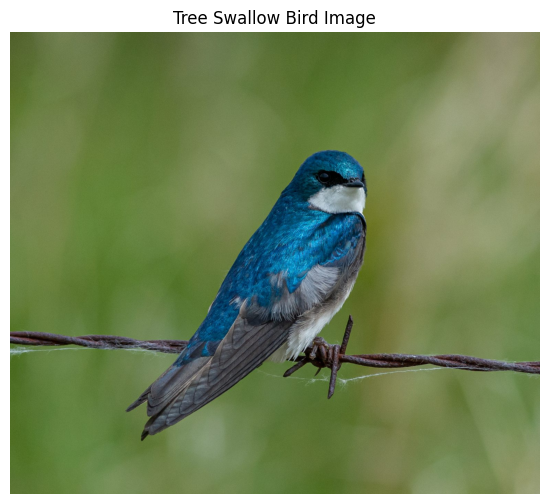

In [ ]:

url = 'https://naturealberta.ca/wp-content/uploads/2025/04/6.-Tree-Swallow-NICK-CARTER-1536x1340.jpg'
try:
    reps = urllib.request.urlopen(url)
    image_data = reps.read()
except Exception as e:
    print("❌ Error fetching image from URL:", e)
image_array = np.asarray(bytearray(image_data), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
if image is None:
    print("❌ Error: Unable to decode image. Check URL or internet connection.")
else:
    # Step 7: Convert from BGR → RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Step 8: Display the image
    plt.figure(figsize=(8,6))
    plt.imshow(image)
    plt.axis('off')
    plt.title("Tree Swallow Bird Image")
    plt.show()


In [112]:
predict = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


In [ ]:
print(f'The predicted class: {class_names[predict.argmax()]}')

NameError: name 'class_names' is not defined